# Exploratory Data Analysis and Visualization for Amazon Electronics Caregory

**In this project, we are going to make exploratory data analysis and visualization for Amazon Electronics category.**

This project is followed by another project which is a sales estimator for the products in Amazon's electronics category.

We will examine the features and methods before we build a machine learning model.

Before we begin, here is some information about the datasets.
*   I collect data for more than 4000 products in the electronic category.
*   I obtain the datasets from Hellium10 and Keepa. They are the most popular analysis softwares used by a lot of amazon seller.
*   'Monthly Sales' and 'Revenue' values are not reflecting the actual sales, because Amazon does not shares real sales amount.




## Import libraries and datasets

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
hellium10_df = pd.read_csv("/content/Blackbox US Electronics.csv", sep=";")
hellium10_df.head()

,URL,ASIN,Title,Brand,Fulfillment,Category,BSR,Subcategory,Price,Price Trend (90 days) (%),...,Width,Height,Weight,Storage Fee (Jan - Sep),Storage Fee (Oct - Dec),Best Sales Period,Age (Month),Number of Images,Variation Count,Sales to Reviews
0,https://amazon.com/dp/B0933BVK6T,B0933BVK6T,Apple AirTag,Apple,Amazon,Electronics,1,Finders,27.99,-1.0,...,3.23,3.27,0.09,NaN,NaN,12/01/2023,33,6,0,0.23
1,https://amazon.com/dp/B0932QJ2JZ,B0932QJ2JZ,Apple AirTag 4 Pack,Apple,Amazon,Electronics,3,Finders,84.99,-2.0,...,3.23,5.20,0.20,NaN,NaN,05/01/2023,33,6,0,0.36
2,https://amazon.com/dp/B0CHWRXH8B,B0CHWRXH8B,Apple AirPods Pro (2nd Generation) Wireless Ea...,Apple,Amazon,Electronics,2,Earbud Headphones,189.00,-6.0,...,4.45,4.49,0.51,NaN,NaN,12/01/2023,4,6,1,4.48
3,https://amazon.com/dp/B07PXGQC1Q,B07PXGQC1Q,Apple AirPods (2nd Generation) Wireless Ear Bu...,Apple,Amazon,Electronics,4,Earbud Headphones,99.00,-1.0,...,3.86,3.90,0.40,NaN,NaN,03/01/2023,58,6,0,0.06
4,https://amazon.com/dp/B09BKHHL5H,B09BKHHL5H,Surge Protector USB Outlet Extender - 5-Outlet...,Lvetek,FBA,Electronics,11,Surge Protectors,12.98,-8.0,...,3.82,5.66,0.49,22.73,79.07,01/01/2024,26,8,0,1.93


In [84]:
keepa_df = pd.read_csv("/content/Keepa US Electronics.csv")
keepa_df.head()

,ASIN,Buy Box 🚚: Current,Title,Sales Rank: Current,Sales Rank: 90 days avg.,Sales Rank: Drops last 90 days,Sales Rank: Subcategory Sales Ranks,Bought in past month
0,B0933BVK6T,$ 27.99,Apple AirTag,1.0,3,33,# 1 | Top 1% | Item Finders,10000
1,B0932QJ2JZ,$ 84.99,Apple AirTag 4 Pack,3.0,3,98,# 2 | Top 1% | Item Finders,10000
2,B0CHWRXH8B,$ 189.00,Apple AirPods Pro (2nd Generation) Wireless Ea...,2.0,5,100,# 1 | Top 1% | Earbud & In-Ear Headphones,10000
3,B07PXGQC1Q,$ 99.00,Apple AirPods (2nd Generation) Wireless Ear Bu...,4.0,5,105,# 2 | Top 1% | Earbud & In-Ear Headphones,10000
4,B09BKHHL5H,$ 12.98,Surge Protector USB Outlet Extender - 5-Outlet...,13.0,41,197,# 1 | Top 1% | Surge Protectors,10000


In [85]:
print("hellium10_df.shape", hellium10_df.shape)
print("keepa_df.shape", keepa_df.shape)

hellium10_df.shape (4200, 31)
keepa_df.shape (4093, 8)


We will merge two data sets on 'ASIN' column.

* ASIN is the standart identification number of a product in Amazon. Each ASIN is unique and describes only one product.

In [86]:
merged_df = pd.merge(hellium10_df, keepa_df, on="ASIN")
merged_df.head()

,URL,ASIN,Title_x,Brand,Fulfillment,Category,BSR,Subcategory,Price,Price Trend (90 days) (%),...,Number of Images,Variation Count,Sales to Reviews,Buy Box 🚚: Current,Title_y,Sales Rank: Current,Sales Rank: 90 days avg.,Sales Rank: Drops last 90 days,Sales Rank: Subcategory Sales Ranks,Bought in past month
0,https://amazon.com/dp/B0933BVK6T,B0933BVK6T,Apple AirTag,Apple,Amazon,Electronics,1,Finders,27.99,-1.0,...,6,0,0.23,$ 27.99,Apple AirTag,1.0,3,33,# 1 | Top 1% | Item Finders,10000
1,https://amazon.com/dp/B0932QJ2JZ,B0932QJ2JZ,Apple AirTag 4 Pack,Apple,Amazon,Electronics,3,Finders,84.99,-2.0,...,6,0,0.36,$ 84.99,Apple AirTag 4 Pack,3.0,3,98,# 2 | Top 1% | Item Finders,10000
2,https://amazon.com/dp/B0CHWRXH8B,B0CHWRXH8B,Apple AirPods Pro (2nd Generation) Wireless Ea...,Apple,Amazon,Electronics,2,Earbud Headphones,189.00,-6.0,...,6,1,4.48,$ 189.00,Apple AirPods Pro (2nd Generation) Wireless Ea...,2.0,5,100,# 1 | Top 1% | Earbud & In-Ear Headphones,10000
3,https://amazon.com/dp/B07PXGQC1Q,B07PXGQC1Q,Apple AirPods (2nd Generation) Wireless Ear Bu...,Apple,Amazon,Electronics,4,Earbud Headphones,99.00,-1.0,...,6,0,0.06,$ 99.00,Apple AirPods (2nd Generation) Wireless Ear Bu...,4.0,5,105,# 2 | Top 1% | Earbud & In-Ear Headphones,10000
4,https://amazon.com/dp/B09BKHHL5H,B09BKHHL5H,Surge Protector USB Outlet Extender - 5-Outlet...,Lvetek,FBA,Electronics,11,Surge Protectors,12.98,-8.0,...,8,0,1.93,$ 12.98,Surge Protector USB Outlet Extender - 5-Outlet...,13.0,41,197,# 1 | Top 1% | Surge Protectors,10000


Let's drop some duplicated columns to clean dataset.

In [87]:
merged_df.columns

Index(['URL', 'ASIN', 'Title_x', 'Brand', 'Fulfillment', 'Category', 'BSR',
       'Subcategory', 'Price', 'Price Trend (90 days) (%)', 'Monthly Sales',
       'Sales Trend (90 days) (%)', 'Monthly Revenue', 'Review Count',
       'Reviews Rating', 'Seller', 'Number of Active Sellers',
       'Last Year Sales', 'Sales Year Over Year (%)', 'Size Tier', 'Length',
       'Width', 'Height', 'Weight', 'Storage Fee (Jan - Sep)',
       'Storage Fee (Oct - Dec)', 'Best Sales Period', 'Age (Month)',
       'Number of Images', 'Variation Count', 'Sales to Reviews',
       'Buy Box 🚚: Current', 'Title_y', 'Sales Rank: Current',
       'Sales Rank: 90 days avg.', 'Sales Rank: Drops last 90 days',
       'Sales Rank: Subcategory Sales Ranks', 'Bought in past month'],
      dtype='object')

In [88]:
drop_columns = ['Buy Box 🚚: Current', 'Title_y', 'Sales Rank: Current','Sales Year Over Year (%)', 'Sales to Reviews', 'Price Trend (90 days) (%)', 'Sales Trend (90 days) (%)']

merged_df.drop(drop_columns, axis=1, inplace=True)

In [89]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   URL                                  4184 non-null   object 
 1   ASIN                                 4184 non-null   object 
 2   Title_x                              4184 non-null   object 
 3   Brand                                4175 non-null   object 
 4   Fulfillment                          4184 non-null   object 
 5   Category                             4184 non-null   object 
 6   BSR                                  4184 non-null   int64  
 7   Subcategory                          4158 non-null   object 
 8   Price                                4184 non-null   float64
 9   Monthly Sales                        4184 non-null   int64  
 10  Monthly Revenue                      4184 non-null   float64
 11  Review Count                  

We have both numerical and categorical columns. We will visualize to better understand their relationship.

There are a lot missing values but, don't worry. Most of the missing values are in unnecessary columns.

We drop the duplicates below.

In [90]:
print("Duplicated before: ", merged_df.duplicated().sum())
merged_df.drop_duplicates(inplace=True, keep="first")
print("Duplicated after: ", merged_df.duplicated().sum())

Duplicated before:  90
Duplicated after:  0


* Before we make visualization, shrink product titles to make better looking graphs.

In [91]:
merged_df["Title_x"] = merged_df["Title_x"].str.split(" ").apply(lambda x: x[:5]).str.join(" ")

## EDA and Visualizations

### First check the relationship between BSR and Monthly Sales

BSR means Best Sellers Rank. Amazon sorts the products by their sales amount. Number 1 best seller is the product with most monthly sales.

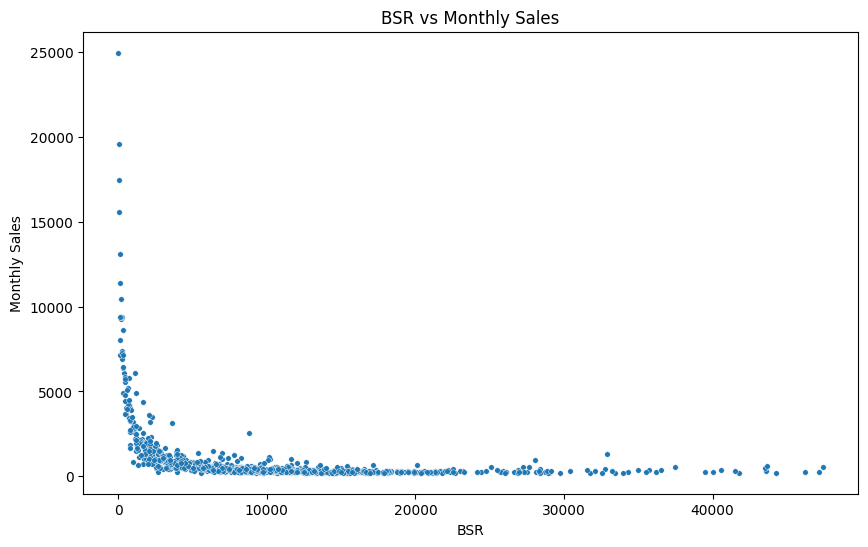

In [92]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=merged_df.sample(1000), x="BSR", y="Monthly Sales")
plt.title("BSR vs Monthly Sales")
plt.rcParams['lines.markersize'] = 8
plt.show();

* As we expected, lower BSR amount indicates more sales.
* There are some products sold more than 30k!
* Under 20k BSR indicates good amount of monthly sales.

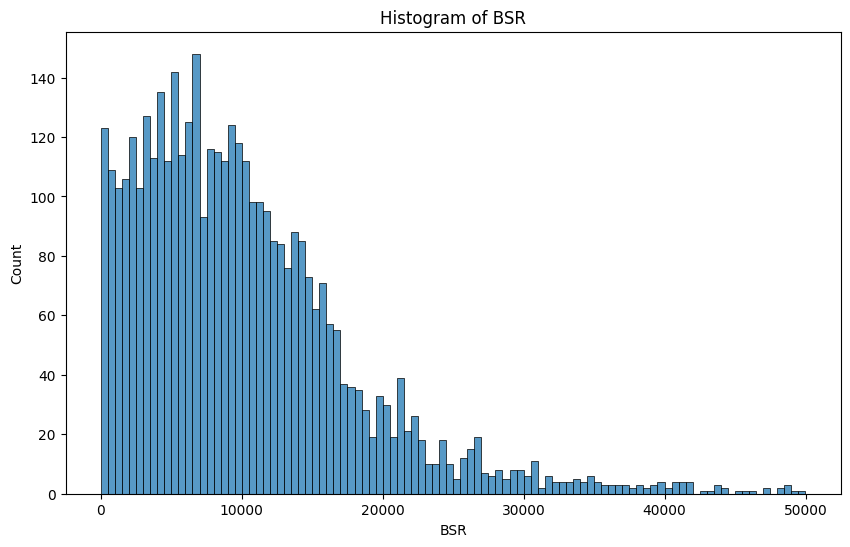

In [93]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(merged_df["BSR"], bins=100)
plt.title("Histogram of BSR")
plt.show();

* Note: The reason behind the right skewness is because I mostly focus on to download best sellers. Normally it is tend to be left skewed.

### Now, check the most selling products

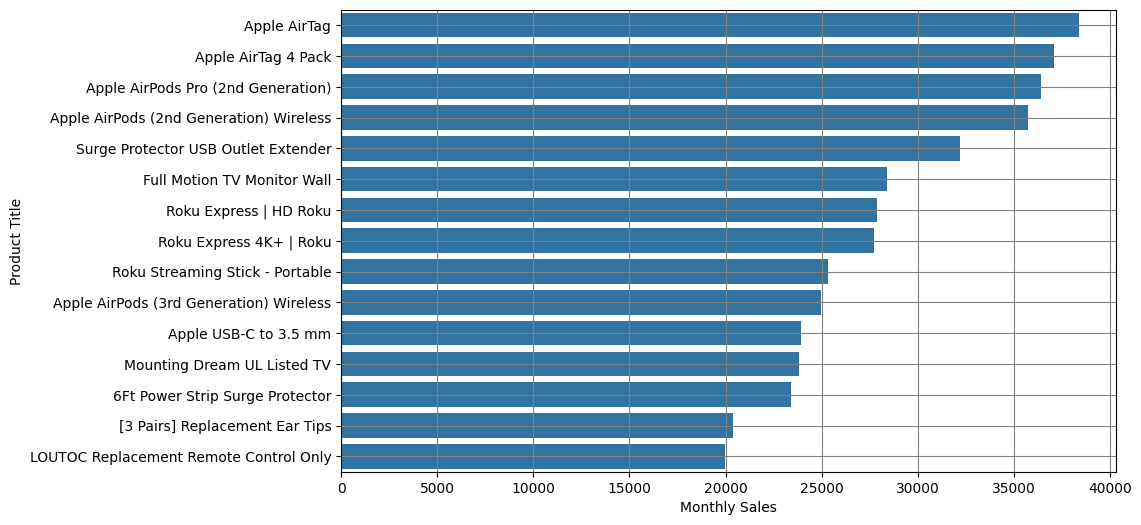

In [120]:
best_selling_products = merged_df.sort_values(by="Monthly Sales", ascending=False).head(15)

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=best_selling_products, x="Monthly Sales", y="Title_x")
plt.grid(visible=True, color="gray")
plt.ylabel("Product Title")
plt.show()

### Monthly sales vs Price Distribution

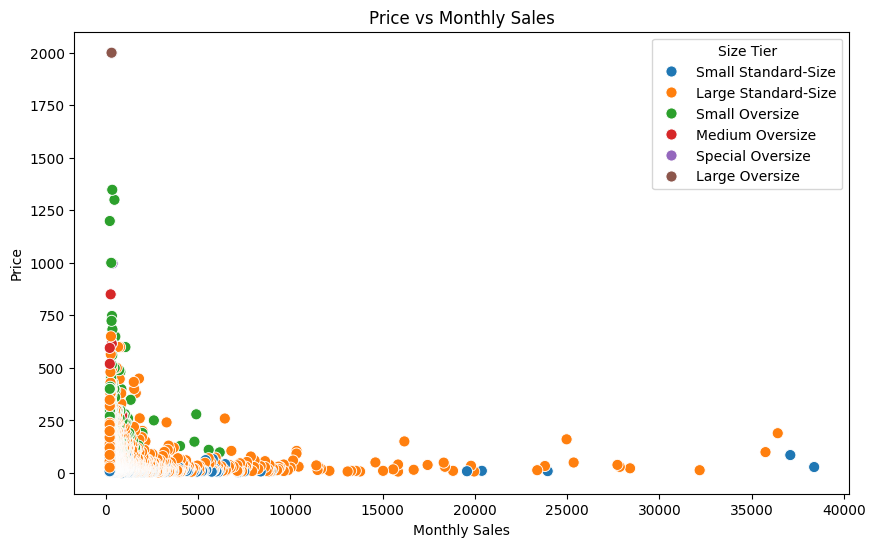

In [95]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=merged_df, x="Monthly Sales", y="Price", hue="Size Tier")
plt.title("Price vs Monthly Sales")
plt.rcParams['lines.markersize'] = 4
plt.show();

* The products sold under $250 has more than 5000 sales in a month.

### Fulfillment Type

There are 3 different fulfillment type in Amazon.
* First is the Amazon. Which indicates the seller and handler of the product is Amazon itself.
* Second, FBA is the Amazon fulfillment service. Amazon stores, handles and ships the orders on seller's behalf.
* The last one is FBM meand Fulfillmentby Merchant. Seller is responsible for all processes.

In [96]:
merged_df["Fulfillment"].value_counts()

Fulfillment
FBA       3554
FBM        294
Amazon     240
-            6
Name: count, dtype: int64

Before we visualize the fulfillment type, remove null values.

In [98]:
merged_df.drop(merged_df[merged_df["Fulfillment"] == "-"].index, inplace=True)

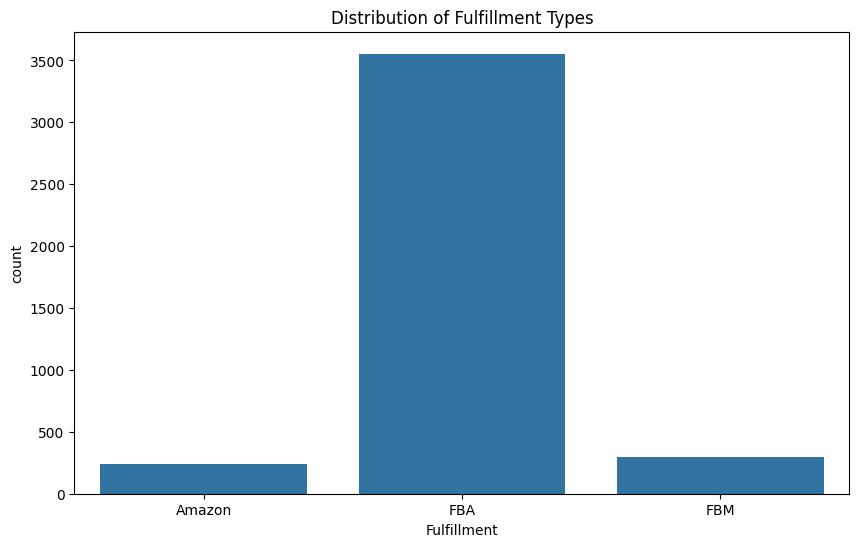

In [99]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=merged_df, x="Fulfillment")
plt.title("Distribution of Fulfillment Types")
plt.show();

* FBA is the most frequent fulfillment type in our dataset. It is certainly a way of increasing sales.

* %10 of the products are sold as FBM.
* Less than %10 of the products are sold by Amazon.

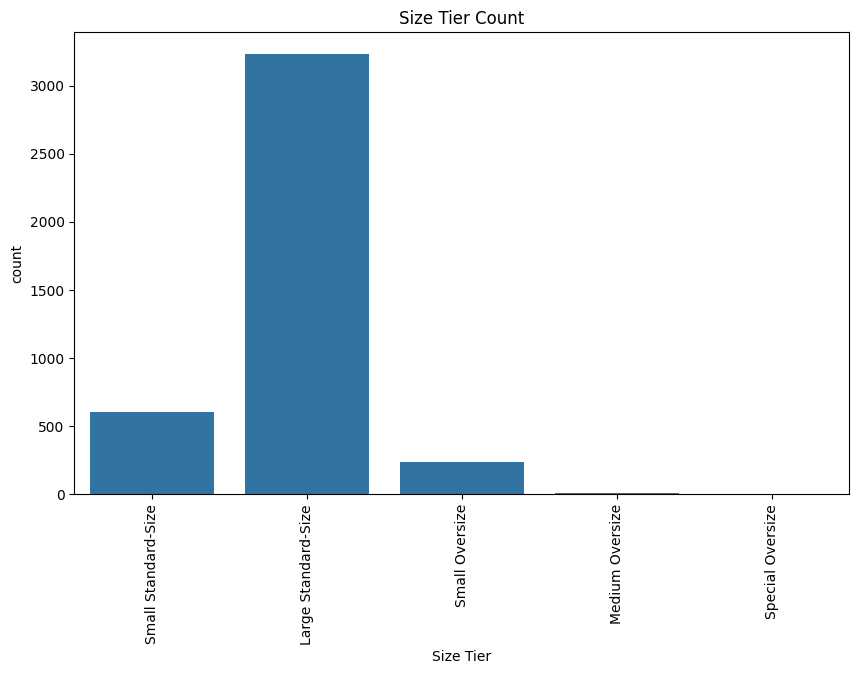

In [100]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=merged_df, x="Size Tier")
plt.xticks(rotation=90)
plt.title("Size Tier Count")
plt.show();

* Most of the products are 'Large Standard-Size' and 'Small Standard-Size'
* Very few products has big dimensions in selling products.


In [115]:
best_sellers_by_size = merged_df.groupby("Size Tier")[["Title_x","Monthly Sales"]].max().reset_index().sort_values(by="Monthly Sales", ascending=False)
best_sellers_by_size

,Size Tier,Title_x,Monthly Sales
3,Small Standard-Size,【Apple MFi Certified】 Video Call+Music+Charge+...,38393
0,Large Standard-Size,【Pack of 2】for Roku-TV-Remote-Control-Replacem...,36418
2,Small Oversize,ynVISION.DESIGN Ultra Slim Micro Gap,6172
1,Medium Oversize,LG CM4590 XBOOM XBOOM Bluetooth,881
4,Special Oversize,Roku Ultra LT Streaming Device,420


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12304 (\N{LEFT BLACK LENTICULAR BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12305 (\N{RIGHT BLACK LENTICULAR BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


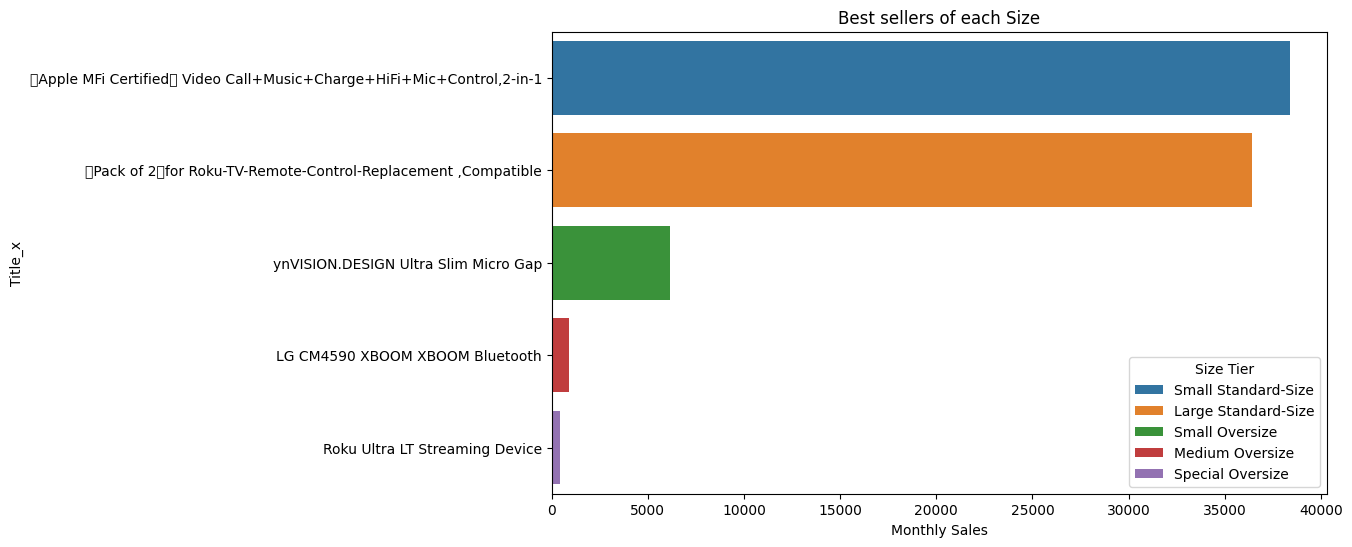

In [116]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=best_sellers_by_size, y="Title_x", x="Monthly Sales", hue="Size Tier")
plt.title("Best sellers of each Size")
plt.show();

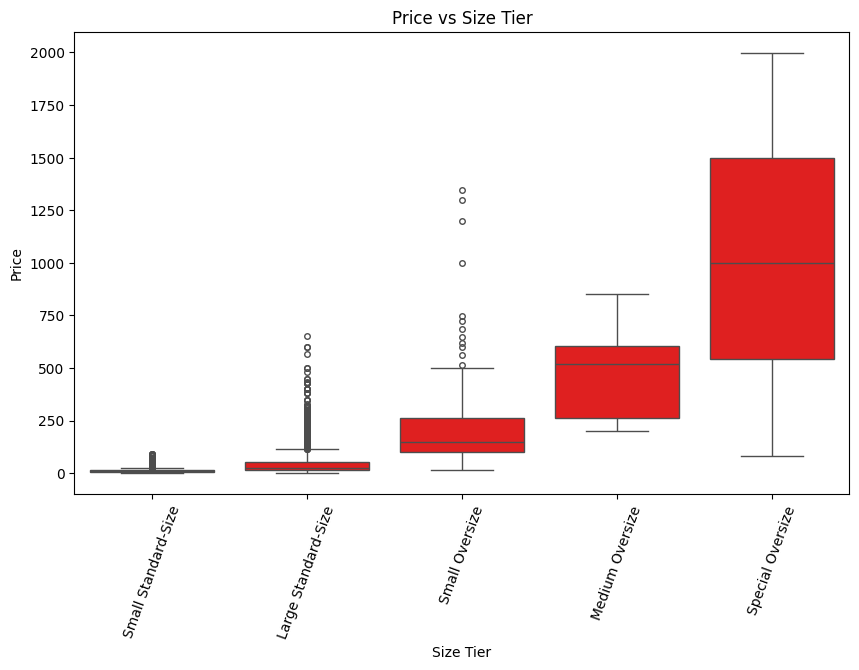

In [117]:
plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, y="Price", x="Size Tier", color="red")
plt.title("Price vs Size Tier")
plt.xticks(rotation=70)
plt.show();

* Bigger products has higher prices.
* Small products are sold cheaper.
* Middle sized products may have more add-value compared to others.
* Small and large standard size groups has outliers.

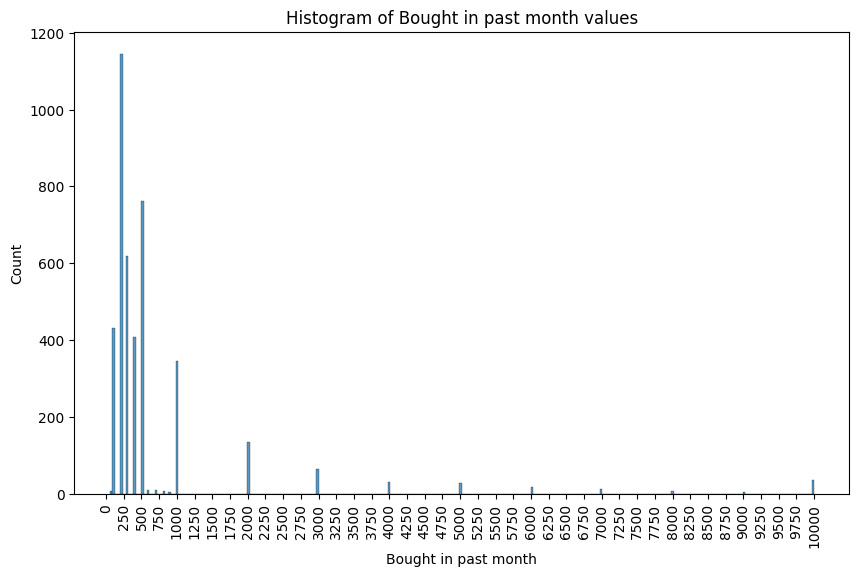

In [118]:
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(data=merged_df, x="Bought in past month", ax=ax)
plt.title("Histogram of Bought in past month values")
plt.xticks(np.arange(0, max(merged_df['Bought in past month'])+1, 250))
plt.xticks(rotation=90)
plt.show();

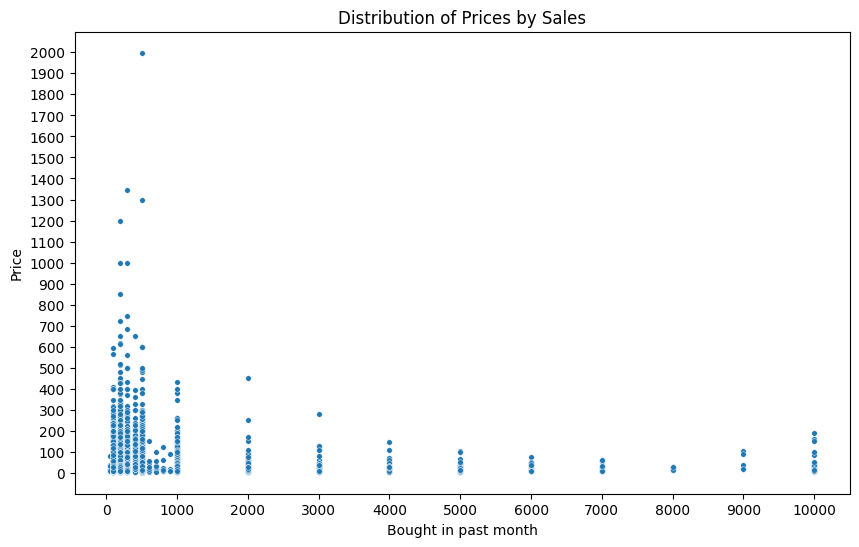

In [123]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=merged_df, x="Bought in past month", y="Price", ax=ax)
plt.title("Distribution of Prices by Sales")
plt.rcParams['lines.markersize'] = 4
plt.yticks(np.arange(0, 2100, 100))
plt.xticks(np.arange(0, 11000, 1000))
plt.show();